<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 11 - Sintesis de función transferencia descargadas
#### Lugano Damian

-------------------------

### Punto 1)

#### Consigna

![Alt text](./pics/Consigna_1.png)

#### Desarrollo

In [188]:
from IPython.display import IFrame
IFrame("./docs/TS11_1.pdf", width=950, height=1000)

#### Simulación numérica

In [189]:
### ---- Imports ----

import sympy as sp
from pytc2.sintesis_dipolo import foster, remover_polo_dc, remover_polo_infinito
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.remociones import remover_polo_jw, remover_valor_en_infinito

### ---- Variable Compleja

s = sp.symbols('s ', complex=True)

In [190]:
### ---- Función excitación (Red no disipativa) ---

Y11=(3*s*(s**2+7/3))/((s**2+2)*(s**2+5))
Y11=sp.nsimplify(Y11)

print_latex(a_equal_b_latex_s('Y_{11}(s)', Y11))

<IPython.core.display.Math object>

In [191]:
### ---- Remoción parcial de polo en DC ----

Z2, Z1 = remover_polo_dc(1/Y11, omega_zero= 1)

print_latex(a_equal_b_latex_s('Z1(s)', Z1))
print_latex(a_equal_b_latex_s('Z2(s)', Z2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [192]:
### --- Remoción completa de polo sobre eje jw=1 ---

Y4, k1, L1, C2 = remover_polo_jw(1/Z2, omega= 1, isImpedance=False)

print_latex(a_equal_b_latex_s('k0', k1))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [193]:
### Remoción completa de polo en DC ---

Z6, Z5 = remover_polo_dc(1/Y4)

print_latex(a_equal_b_latex_s('Z_5(s)', Z5))
print_latex(a_equal_b_latex_s('Z_6(s)', Z6))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Simulación circuital

![Alt text](./pics/circ1.png)

En este caso se tuvo que poner el Resistor R1 por cuestiones de simulación

![Alt text](./pics/sim1.png)

Como se puede observa de la simulación de Y11 y Y21, los polos y los ceros del circuito sintetizado están donde deben.

### Punto 2

#### Consigna

![Alt text](./pics/Consigna_2.png)

#### Desarrollo

In [194]:
from IPython.display import IFrame
IFrame("./docs/TS11_2.pdf", width=950, height=1000)

### Verificación mediante simulación simbólica

#### Por impedancia


In [195]:
from pytc2.cuadripolos import Z2Tabcd_s, Y2Tabcd_s, Tabcd2Z_s, Tabcd2Y_s
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

In [196]:
# ----------- Variables -----------

S=sp.symbols('s', complex=True)

R1= 1
R2= 1/4
C1= 2/5
C2= 4
C3= 2


In [197]:
TR1= sp.Matrix  ([ 
                    [1, R1],
                    [0, 1]
                ])

TC1= sp.Matrix  ([ 
                    [1, 1/(s*C1)],
                    [0, 1]
                ])

TRC2= sp.Matrix  ([ 
                    [1,                  0],
                    [1/( R2+ 1/(s*C2) ), 1]
                ])


TC3= sp.Matrix  ([ 
                    [1, 0],
                    [s*C3, 1]
                ])


In [198]:
T=TR1*TC1*TRC2*TC3

T=sp.expand(T)
T=sp.nsimplify(T)
T=sp.expand(T)

print_latex(a_equal_b_latex_s('T', T))

<IPython.core.display.Math object>

In [199]:
Tr=1/T[0,0]

Tr=sp.factor(Tr)

print_latex(a_equal_b_latex_s('T_r', Tr))

<IPython.core.display.Math object>

Entonces $K=1/2$

In [200]:
Z11=T[0,0]/T[1,0]

Z11=sp.factor(Z11)

print_latex(a_equal_b_latex_s('Z_{11}', Z11))

<IPython.core.display.Math object>

In [201]:
Z21=1/T[1,0]

Z21=sp.factor(Z21)

print_latex(a_equal_b_latex_s('Z_{21}', Z21))

<IPython.core.display.Math object>

#### Por admitancia

In [202]:
# ----------- Variables -----------

R1= 2
R2= 4
R3= 2/5
C2= 1/4
C3= 1

In [203]:
TR1= sp.Matrix  ([ 
                    [1, R1],
                    [0, 1]
                ])

TRC2= sp.Matrix  ([ 
                    [1, 1/(s*C2 + 1/R2)],
                    [0, 1]
                ])

TC3= sp.Matrix  ([ 
                    [1,    0],
                    [s*C3, 1]
                ])


TR3= sp.Matrix  ([ 
                    [1, 0],
                    [1/R3, 1]
                ])


In [204]:
T=TR1*TRC2*TR3*TC3

T=sp.expand(T)
T=sp.nsimplify(T)
T=sp.expand(T)

print_latex(a_equal_b_latex_s('T', T))

<IPython.core.display.Math object>

In [205]:
Tr=1/T[0,0]

Tr=sp.factor(Tr)

print_latex(a_equal_b_latex_s('T_r', Tr))

<IPython.core.display.Math object>

### Simulación en SPICE

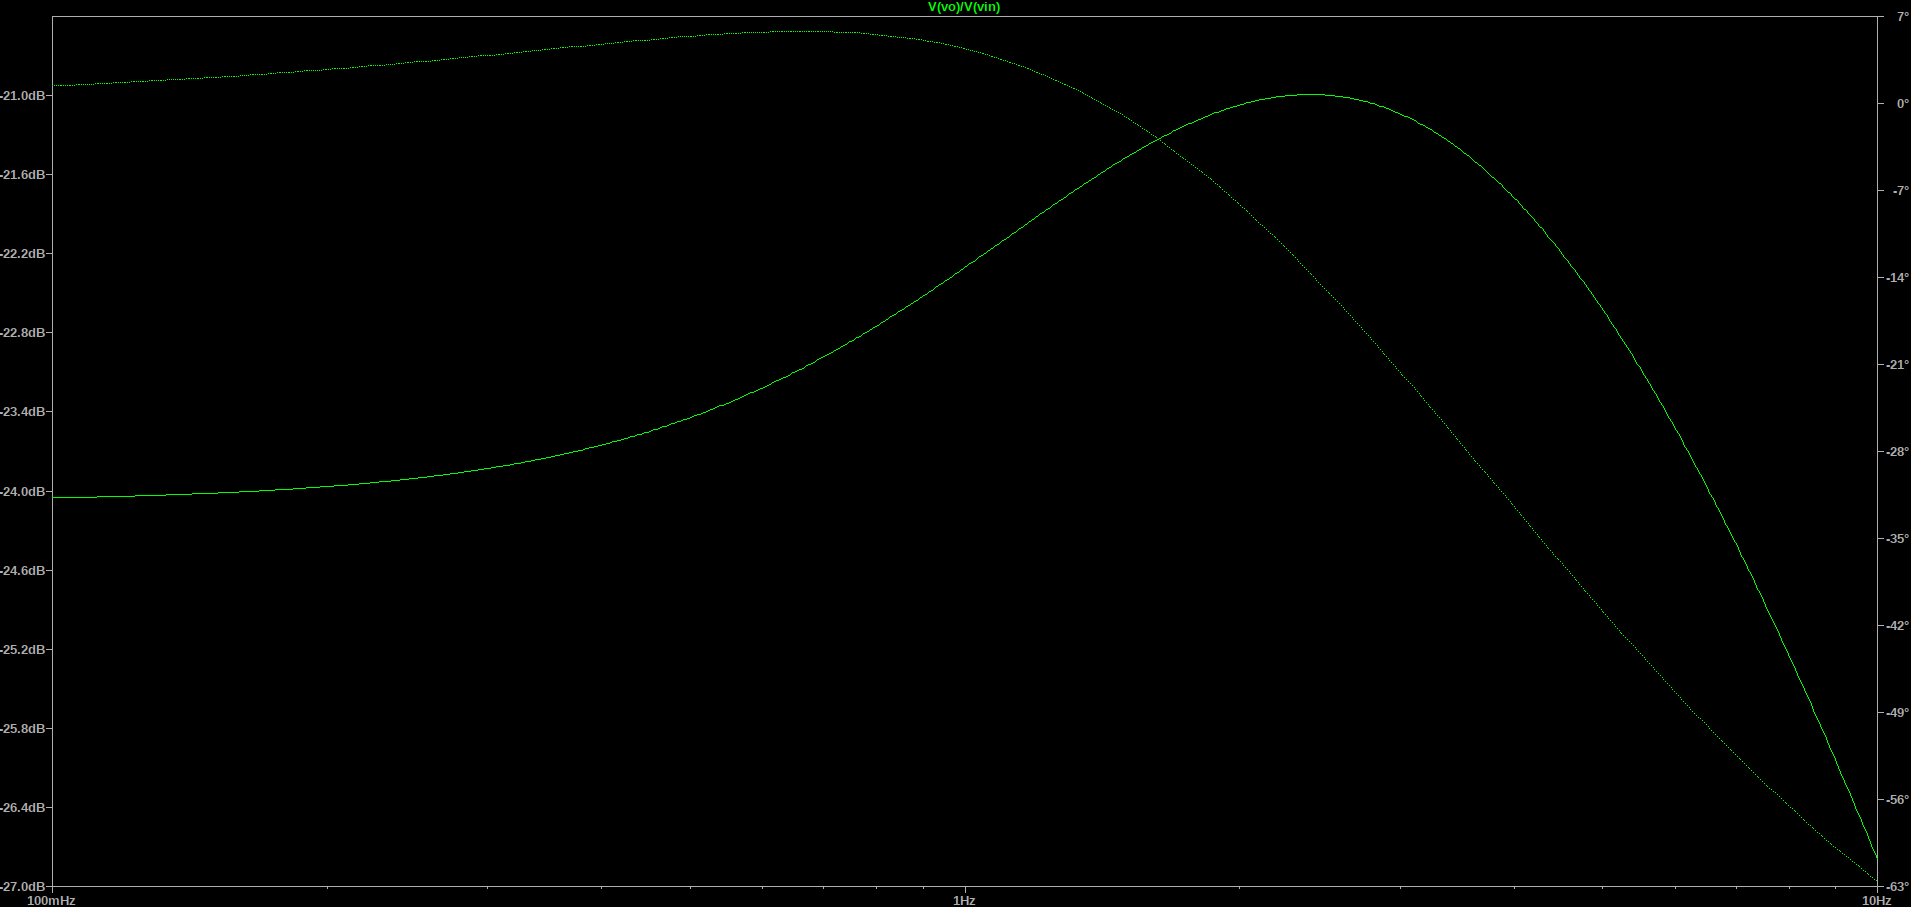

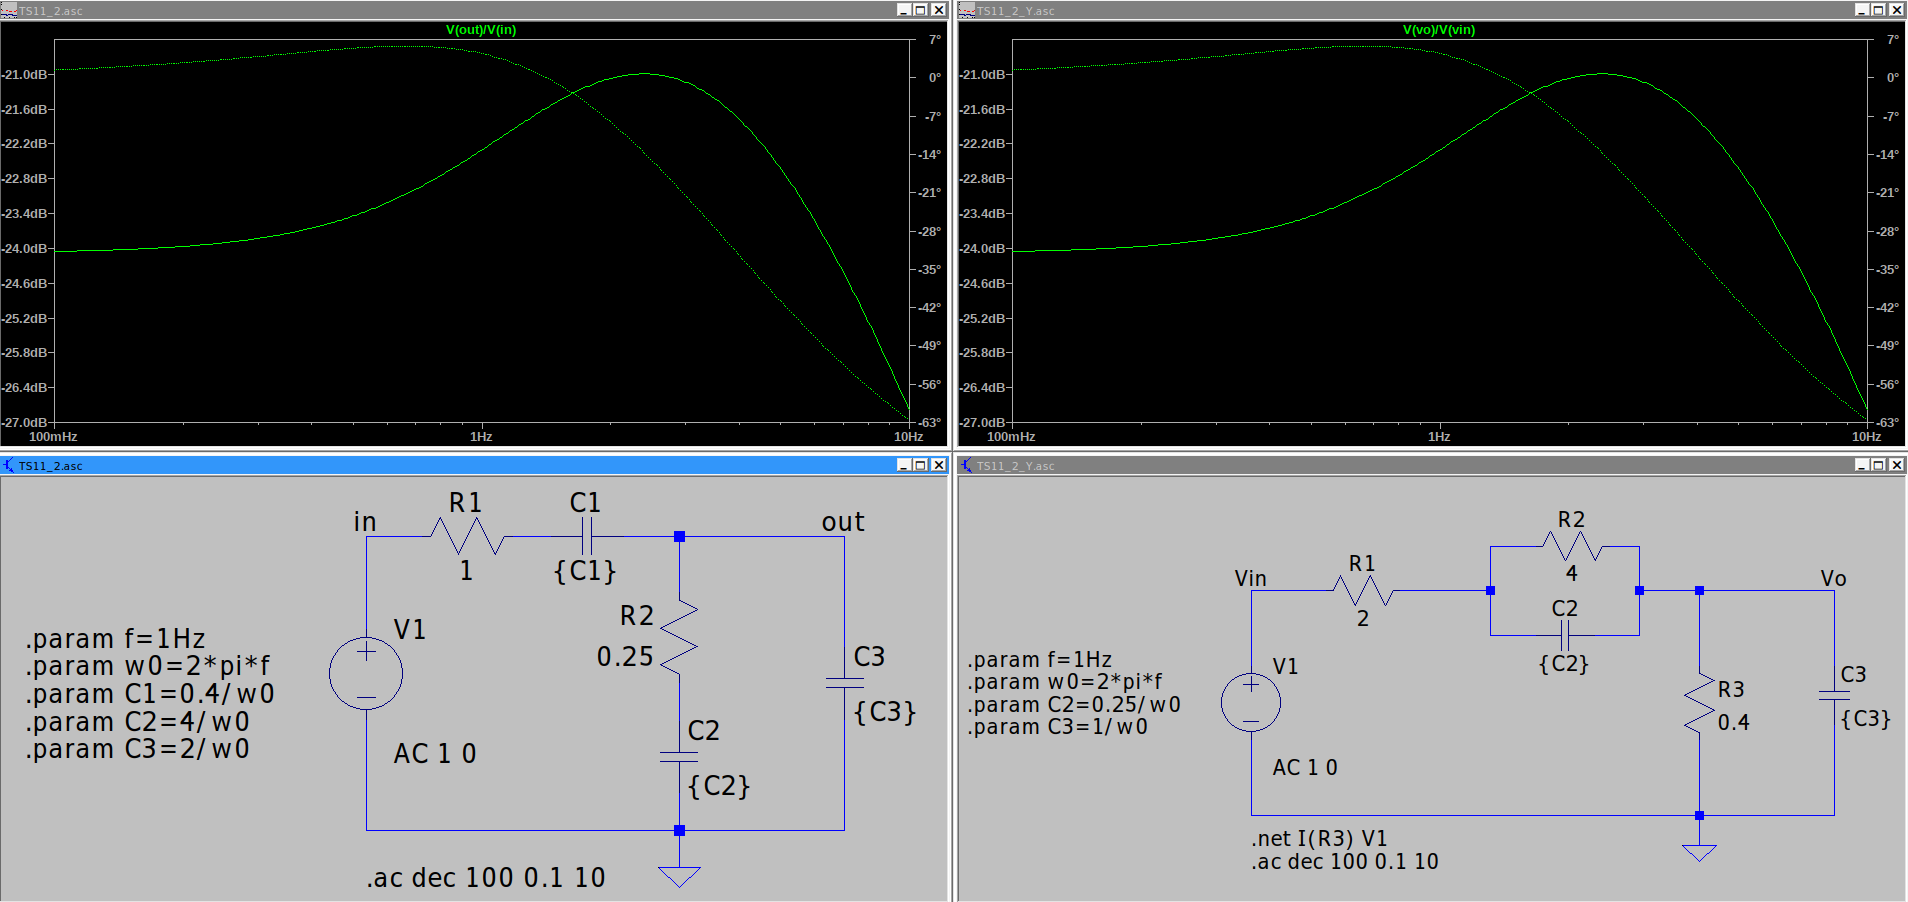